## Data Preprocessing


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('spam.tsv', sep='\t')

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [ ]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']



In [ ]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [ ]:
ham = ham.sample(spam.shape[0])

In [ ]:
ham.shape

(747, 4)

In [ ]:
data = ham.append(spam, ignore_index=True)

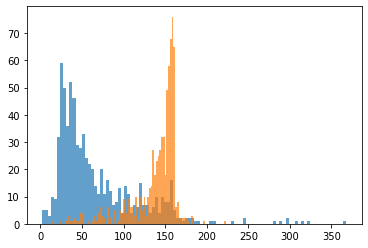

In [ ]:
plt.hist(data[data['label'] == 'ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins=100, alpha=0.7)
plt.show()

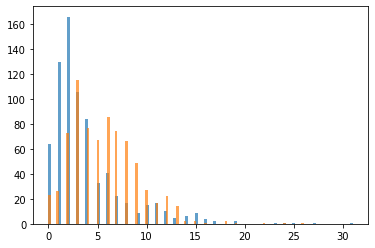

In [ ]:
plt.hist(data[data['label'] == 'ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins=100, alpha=0.7)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=0, shuffle=True)

In [ ]:
X_train.shape, X_test.shape

((1045,), (449,))

## Building the model (Random Forest)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [ ]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', RandomForestClassifier(n_estimators=100))])

In [ ]:
classifier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

## Predicting the results (Random Forest)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test, y_pred)

0.9487750556792873

In [ ]:
confusion_matrix(y_test, y_pred)

array([[226,   1],
       [ 22, 200]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       227
        spam       1.00      0.90      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



## Building the model SVM(support vector machine)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', SVC(C=100, gamma='auto'))])

In [ ]:
svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ov

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9532293986636972

In [ ]:
confusion_matrix(y_test, y_pred)

array([[222,   5],
       [ 16, 206]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.98      0.95       227
        spam       0.98      0.93      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [ ]:
test1 = ['Hello, You are learning natural Language Processing!']
test2 = ['Hope you are doing good and learning new things!']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million! To claim call on 446677']


In [ ]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']


In [ ]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test2))

['ham']
['ham']
['ham']
